In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = ImageDataGenerator(rescale = 1/255)
val = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory('FER2013/train',target_size=(72,72),batch_size = 16,classes = ['angry','disgust','fear','happy','neutral','sad','surprise'])
val_dataset = val.flow_from_directory('FER2013/test',target_size=(72,72),batch_size = 16,classes = ['angry','disgust','fear','happy','neutral','sad','surprise'],)
 
input_shape = (72,72,3)

image_input = Input(input_shape)

xcept = Xception(input_shape=(72,72,3), weights='imagenet', include_top=False)(image_input)


xcept.trainable = False
  

x = Flatten()(xcept)
x = Dense(128, activation='relu')(x)
x = Dense(64,activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=image_input, outputs=prediction)

#model.summary()
 
model.compile(
   loss = 'categorical_crossentropy',
   optimizer = tf.keras.optimizers.Adam(),
   metrics = ['accuracy'],
)

#filepath="/content/drive/MyDrive/Results/Xception/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint('/content/drive/MyDrive/Results/Xception/weights_improvement-{epoch:02d}-{val_acc:.2f}.hdf5',verbose=1,monitor='val_acc',save_best_only=True,mode='max')
early_stop = EarlyStopping(monitor='val_loss',patience=15,verbose=1)
#log_csv = CSVLogger('Results/Xception/logs.csv',separator=',',append=False)

#callbacks_list = [early_stop, log_csv]

X = model.fit(
   train_dataset,
   validation_data = val_dataset,
   epochs = 50,
   verbose=1,
   #steps_per_epoch = len(train_dataset),
   #validation_steps = len(val_dataset),
   callbacks = early_stop,
)
 
fer_json = model.to_json()
with open("Xception.json", "w") as json_file:
   json_file.write(fer_json)
model.save_weights("Xception.h5")


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50
1795/1795 [==============================] - 87s 48ms/step - loss: 1.4593 - accuracy: 0.4454 - val_loss: 1.3375 - val_accuracy: 0.4565
Epoch 2/50
1795/1795 [==============================] - 89s 49ms/step - loss: 1.2277 - accuracy: 0.5404 - val_loss: 1.2380 - val_accuracy: 0.5362
Epoch 3/50
1795/1795 [==============================] - 90s 50ms/step - loss: 1.1006 - accuracy: 0.5922 - val_loss: 1.1047 - val_accuracy: 0.5922
Epoch 4/50
1795/1795 [==============================] - 90s 50ms/step - loss: 0.9894 - accuracy: 0.6381 - val_loss: 1.1289 - val_accuracy: 0.5999
Epoch 5/50
1795/1795 [==============================] - 90s 50ms/step - loss: 0.8845 - accuracy: 0.6800 - val_loss: 1.2589 - val_accuracy: 0.5648
Epoch 6/50
1795/1795 [==============================] - 90s 50ms/step - loss: 0.7782 - accuracy: 0.7191 - val_loss: 1.2185 - val_accuracy: 0.5949
Epoch 7/50
1795/1795 [=================

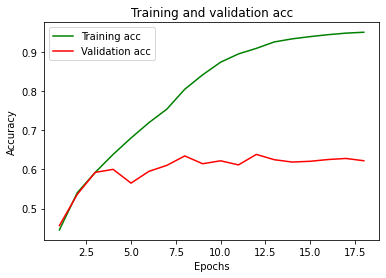

In [6]:
acc = X.history['accuracy']
val_acc = X.history['val_accuracy']
epochs = range(1,19)
plt.plot(epochs,acc,'g',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
input_shape = (72,72,3)

image_input = Input(input_shape)

xcept = Xception(input_shape=(72,72,3), weights='imagenet', include_top=False)(image_input)


xcept.trainable = False
  

x = Flatten()(xcept)
x = Dense(128, activation='relu')(x)
x = Dense(64,activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=image_input, outputs=prediction)
model.summary()